In [9]:
from sklearn import cross_validation
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import KFold

boston = load_boston()

x=pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target,columns=['MEDV'])

In [10]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
それぞれのカラムは何を表しているのか

１９７０年、国勢調査

CRIM：人口1人当たりの犯罪発生数

ZN：25,000平方フィート以上の住居区画の占める割合

INDUS：小売業以外の商業が占める面積の割合

CHAS：チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)

NOX：NOxの濃度

RM：住居の平均部屋数

AGE：1940年より前に建てられた物件の割合

DIS：5つのボストン市の雇用施設からの距離

RAD：環状高速道路へのアクセスしやすさ

TAX：$10,000ドルあたりの不動産税率の総計

PTRATIO：町毎の児童と教師の比率

B：町毎の黒人(Bk)の比率を次の式で表したもの。1000(Bk – 0.63)^2

LSTAT：給与の低い職業に従事する人口の割合

target：住宅価格の中央値

In [11]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


describeメソッドを用いることで把握できたこと(考察)を記述せよ

（前処理に関して気をつけるべき点、機械学習の手法選択に活かせること、機械学習の特徴選択について考えられること）

・項目によって数値の桁が違う。（１と１０の違いでも影響の差の大小が違うのではないか）

・全て数値（文字列がないため、数値への変換が不要）

・項目が多いので特徴量を増やしすぎると過学習が起きてしまうかも

・・・・



二変数の可視化について記述せよ　相関

（そもそも相関とは何か、MEDVにもっとも相関があると出力された変数を3つほどあげよ、相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ））

相関分析は、データとデータとの間に何らかの関連性があるか分析するための手法。

相関が高いものを組み合わせることで精度の高いシミュレーションができる。

今回MEDVと相関が高かったのは下記の三つ

・LSTAT

・RM

・PTRATIO	

【相関の注意点について記述せよ】

便利な相関であるが、落とし穴がある、相関が正しく2変数の関係を表していない時がある、それはどのような場合か。
その場合、どのような手段によって、確認するべきか

相関係数は、分布の外側のプロットの影響が大きい

→「相関がある。」という結論を出す場合は、 散布図 を描いてみるなりして、妥当なデータを使用しているかのチェックが必要

非線形の場合、相関が低くなる場合がある

→グラフを描いて見るなどして可視化する。（2次曲線の関係性がある場合に相関が低くなる場合もある

In [13]:
X = pd.concat([x,y],axis=1)

In [14]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


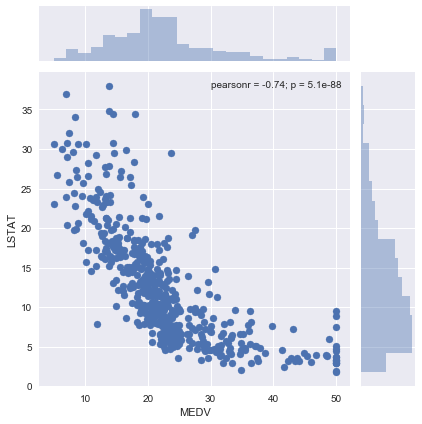

In [19]:
sns.jointplot(x = "MEDV", y = "LSTAT", data = X);

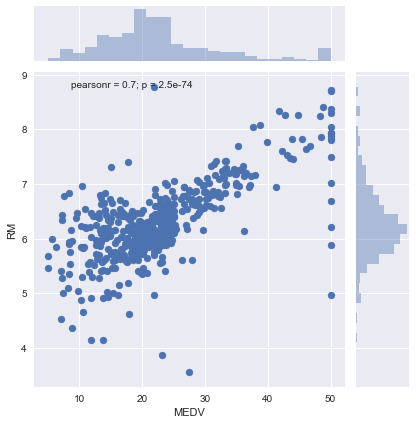

In [21]:
sns.jointplot(x = "MEDV", y = "RM", data = X);

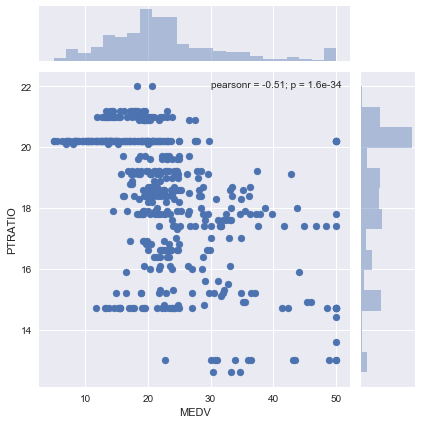

In [20]:
sns.jointplot(x = "MEDV", y = "PTRATIO", data = X);

【二変数の可視化について記述せよ　プロット】

LSTAT、RMはそれぞれ負、正の相関がグラフかみて取れる。

PTRATIOはやや相関があるように見える。

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, x, y, cv=10)

array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
        0.42090343,  0.23656049,  0.36140653, -2.06488186, -1.01206601])

In [24]:
clf  = DecisionTreeRegressor(criterion='mse',  max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [25]:
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [26]:
print(regr_1.score(x_train, y_train))
print(regr_2.score(x_train, y_train))
print(regr_3.score(x_train, y_train))

0.473448072882
0.72668873909
0.828500923487


In [27]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

Automatically created module for IPython interactive environment


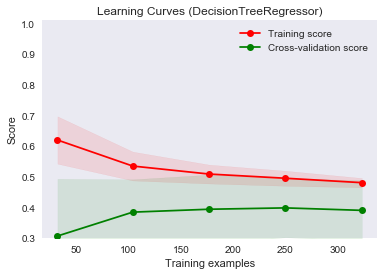

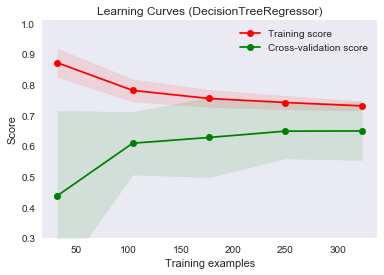

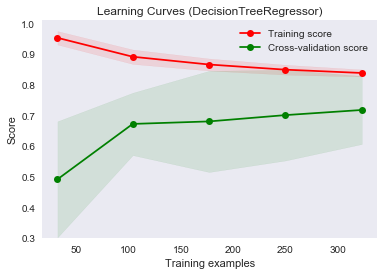

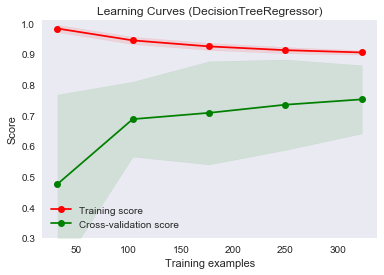

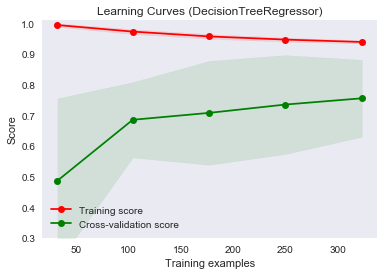

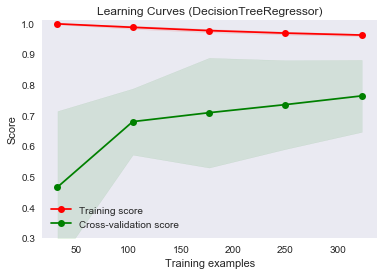

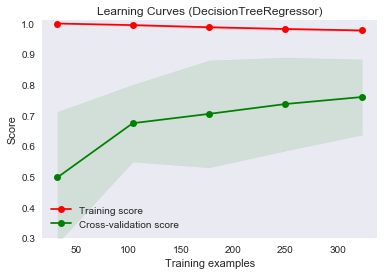

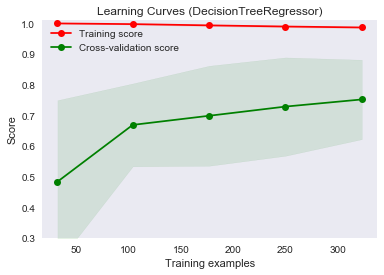

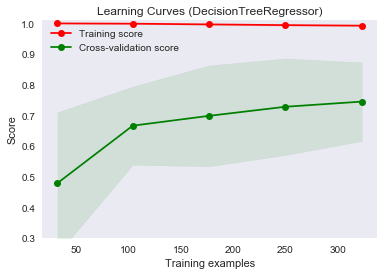

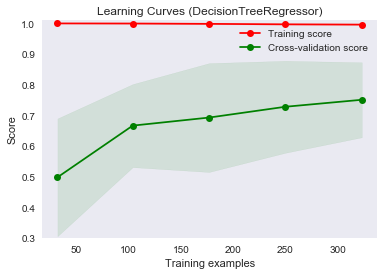

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor



title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

for degree in range(1,11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve (estimator, title, x_train, y_train, ylim=(0.3, 1.01), cv=cv, n_jobs=4)

【学習曲線について記述せよ】
High varianceとは何か
High Biasとは何か
もっとも結果が良いと思われた深さをひとつ選択せよ
なぜその深さが最も良いか記述せよ
その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

High varianceとは過学習をした状態のことで、High Biasとは未学習の状態のことである。

今回のグラフでは深さ5が良いと思われる。理由としてはクロスバリデーションの結果が高いという点と、トレーニングスコアとの乖離が少ないため過学習の可能性が低いと思ったため。

データを増やすことでクロスバリデーションの結果はトレーニングスコアに近づいて行くと考えられる。


In [42]:
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


【グリッドサーチについて記述せよ】
（グリッドサーチとは何か、グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ、その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか）

グリッドサーチとは、ハイパーパラメータの探索空間を格子状 (グリッド) に区切り、交点となるハイパーパラメータの組み合わせについて、すべて調べるという方法。

他にもベイズ最適化などがある。ベイズ最適化では、評価値が大きくなりそうなところを重点的に観測し、逆に小さくなりそうなところは観測しないため、モデルを評価する回数を抑えることができる。低次元のデータで大域的な解を求めたい場合や、グリッドサーチなどで時間がかかっている場合に有効な手法。


In [46]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=3)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'max_depth': 5}


In [47]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'max_depth': 7}


【グリッドサーチを使いこなそう】
グリッドサーチの際、Kfoldの折りたたみの回数を5回と設定しているが、それぞれ3回と10回に変えて検証せよ、また結果を元にどの折りたたみ回数がベストなのか考察せよ

5〜７のあたりにベストな回数があるのではないか。

グリッドサーチにおいて評価方法を決定係数を使用していたが、平均二乗誤差に変更せよ

In [63]:
from sklearn.metrics import mean_squared_error

regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(mean_squared_error)
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc,cv=10)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'max_depth': 1}


In [64]:
regr_5 = DecisionTreeRegressor(max_depth=6)
regr_5.fit(x_test, y_test)
print(regr_5.score(x_test, y_test))

0.951552935427
